In [1]:
# Import Necessary Libraries
import zipfile
import os
import matplotlib.pyplot as plt
import shutil
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from torchvision.io import read_image

In [14]:
kaggle_doodle_df = pd.read_csv("/content/drive/MyDrive/Capstone/master_doodle_dataframe.csv")
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,data/traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,data/traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,data/traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,data/traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,data/traffic light/5572841187573760.png


In [15]:
kaggle_doodle_df['image_path'] = kaggle_doodle_df['image_path'].str.replace('data/', '')
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,traffic light/5572841187573760.png


In [16]:
words_to_keep = ['bat', 'line', 'circle', 'airplane','octagon', 'bathtub', 'angel', 'book', 'campfire','candle']

In [17]:
data_subset = kaggle_doodle_df[kaggle_doodle_df['word'].isin(words_to_keep)]

In [ ]:
data_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path
39000,US,"[[[0, 8, 12, 15, 19, 32, 57, 127, 141, 144, 14...",5467297722400768,True,candle,candle/5467297722400768.png
39001,SE,"[[[2, 0], [91, 247]], [[9, 4, 2], [85, 83, 76]...",6514271699599360,True,candle,candle/6514271699599360.png
39002,US,"[[[1, 0, 7, 33, 35, 40, 42], [255, 169, 134, 1...",4800698476658688,True,candle,candle/4800698476658688.png
39003,GB,"[[[12, 20, 20, 33, 76, 88, 89, 64, 60, 8, 0], ...",5143361302298624,True,candle,candle/5143361302298624.png
39004,US,"[[[6, 6, 10, 10, 19, 19, 22, 29, 46, 53, 86, 8...",6521918616240128,True,candle,candle/6521918616240128.png


In [18]:
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
categ = le.fit_transform(data_subset['word'])
data_subset['word'] = categ
data_subset.head()

<ipython-input-18-8599440668d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['word'] = categ


,countrycode,drawing,key_id,recognized,word,image_path
39000,US,"[[[0, 8, 12, 15, 19, 32, 57, 127, 141, 144, 14...",5467297722400768,True,6,candle/5467297722400768.png
39001,SE,"[[[2, 0], [91, 247]], [[9, 4, 2], [85, 83, 76]...",6514271699599360,True,6,candle/6514271699599360.png
39002,US,"[[[1, 0, 7, 33, 35, 40, 42], [255, 169, 134, 1...",4800698476658688,True,6,candle/4800698476658688.png
39003,GB,"[[[12, 20, 20, 33, 76, 88, 89, 64, 60, 8, 0], ...",5143361302298624,True,6,candle/5143361302298624.png
39004,US,"[[[6, 6, 10, 10, 19, 19, 22, 29, 46, 53, 86, 8...",6521918616240128,True,6,candle/6521918616240128.png


In [ ]:
train_csv = data_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_0.csv', index=False)

In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_0.csv')
train_csv.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,US,"[[[0, 8, 12, 15, 19, 32, 57, 127, 141, 144, 14...",5467297722400768,True,6,candle/5467297722400768.png
1,SE,"[[[2, 0], [91, 247]], [[9, 4, 2], [85, 83, 76]...",6514271699599360,True,6,candle/6514271699599360.png
2,US,"[[[1, 0, 7, 33, 35, 40, 42], [255, 169, 134, 1...",4800698476658688,True,6,candle/4800698476658688.png
3,GB,"[[[12, 20, 20, 33, 76, 88, 89, 64, 60, 8, 0], ...",5143361302298624,True,6,candle/5143361302298624.png
4,US,"[[[6, 6, 10, 10, 19, 19, 22, 29, 46, 53, 86, 8...",6521918616240128,True,6,candle/6521918616240128.png


In [ ]:
print(len(train_csv))

30000


In [19]:
x = data_subset.drop('word', axis=1)
y = data_subset['word']
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.3, random_state=33, stratify=y)

In [20]:
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, test_size=0.5, random_state=33, stratify=valid_y)

# Basic Model

In [5]:
batch_size = 64

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self._to_linear = None
        self._compute_input_size()

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def _compute_input_size(self):
        with torch.no_grad():
            x = torch.randn(1, 1, 64, 64)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            print(x.view(x.size(0), -1).size())
            self._to_linear = x.view(x.size(0), -1).size(1)


cnn_model = CNN()


torch.Size([1, 2704])


In [21]:


optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

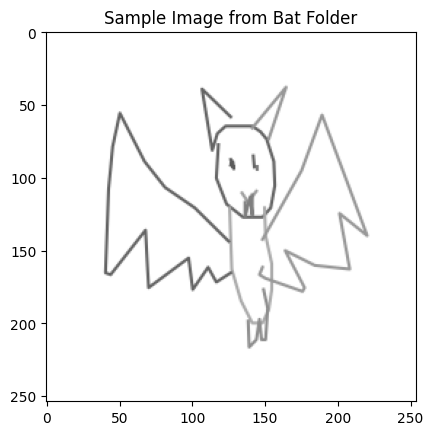

In [ ]:
image_cv2 = cv2.imread("/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/bat/6482096434446336.png")
image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Sample Image from Bat Folder")
plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


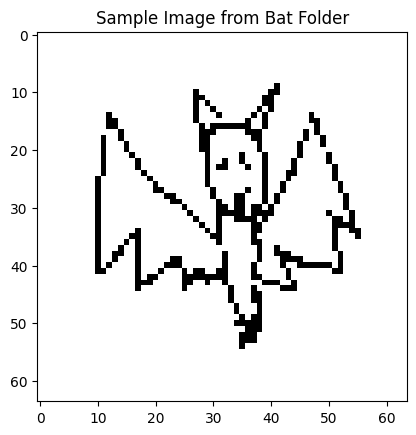

In [ ]:
import numpy as np

image_cv2 = cv2.imread("/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/bat/6482096434446336.png")
# convert image to single channel greyscale
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
# resize image to 64 x 64
image_resized = cv2.resize(image_gray, (64, 64))
threshold = 100
_, image_thresholded = cv2.threshold(image_resized,250,255,cv2.THRESH_BINARY)
#image_thresholded = image_thresholded.astype(np.float32) / 255.0
print(image_resized)
plt.imshow(image_thresholded, cmap='gray')
plt.title("Sample Image from Bat Folder")
plt.show()


In [ ]:
train_xy = pd.concat([train_x, train_y], axis=1)
train_xy.head()

,countrycode,drawing,key_id,recognized,image_path,word
39612,CA,"[[[53, 17, 8, 4, 0, 5, 9, 18, 79, 86, 89, 81, ...",4711610167853056,True,candle/4711610167853056.png,6
991221,RS,"[[[115, 99, 89, 74, 66, 56, 46, 19, 1, 1, 10, ...",6328548115611648,True,bat/6328548115611648.png,2
770860,CA,"[[[0, 15, 87, 102, 102, 73, 32, 5, 7, 0], [24,...",5914045557243904,True,octagon/5914045557243904.png,9
312955,US,"[[[93, 139, 151, 157, 145, 133, 121, 102, 89, ...",4921001567584256,True,angel/4921001567584256.png,1
112003,US,"[[[75, 16, 81, 174, 106, 79, 63, 58], [172, 23...",5144739785474048,True,campfire/5144739785474048.png,5


In [22]:
test_xy = pd.concat([valid_x, valid_y], axis=1)
test_xy.head()

,countrycode,drawing,key_id,recognized,image_path,word
839498,TH,"[[[9, 38, 107, 113, 121, 123, 125, 126], [21, ...",4929237989457920,True,book/4929237989457920.png,4
313997,US,"[[[129, 111, 91, 86, 83, 89, 98, 109, 133, 146...",6152568474435584,True,angel/6152568474435584.png,1
376226,CZ,"[[[36, 83, 217, 224, 219, 206, 183, 160, 115, ...",5741055393660928,True,bathtub/5741055393660928.png,3
41723,RS,"[[[0, 19, 23], [84, 193, 252]], [[18, 60, 66, ...",4651319681875968,True,candle/4651319681875968.png,6
992621,FI,"[[[126, 123, 125, 130, 133, 139, 136, 130, 129...",4554669516914688,True,bat/4554669516914688.png,2


In [ ]:
train_xy_csv = train_xy.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv', index=False)

In [2]:
train_xy = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv')
train_xy.head()

,countrycode,drawing,key_id,recognized,image_path,word
0,CA,"[[[53, 17, 8, 4, 0, 5, 9, 18, 79, 86, 89, 81, ...",4711610167853056,True,candle/4711610167853056.png,6
1,RS,"[[[115, 99, 89, 74, 66, 56, 46, 19, 1, 1, 10, ...",6328548115611648,True,bat/6328548115611648.png,2
2,CA,"[[[0, 15, 87, 102, 102, 73, 32, 5, 7, 0], [24,...",5914045557243904,True,octagon/5914045557243904.png,9
3,US,"[[[93, 139, 151, 157, 145, 133, 121, 102, 89, ...",4921001567584256,True,angel/4921001567584256.png,1
4,US,"[[[75, 16, 81, 174, 106, 79, 63, 58], [172, 23...",5144739785474048,True,campfire/5144739785474048.png,5


In [3]:
from PIL import Image

class DoodleDataset(torch.utils.data.Dataset):
  def  __init__(self, annotations_file, image_root_dir, transform = None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = image_root_dir
    self.transform = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize first
        transforms.ToTensor(),
        #transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0), torch.tensor(1.0)).astype(torch.float32))  # Apply thresholding after conversion
        #transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device)))
        transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device))), # Apply thresholding after conversion
        # Move Normalize to be applied after ToTensor
        transforms.Normalize((0.5,), (0.5,))
    ])
    #self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = self.img_labels.iloc[idx, 4].replace('data/', '')
    img_path = os.path.join(self.img_dir, img_path)
    image = Image.open(img_path).convert("L")
    label = self.img_labels.iloc[idx, 5]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label


In [25]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

class DoodleDataset(Dataset):
    def __init__(self, annotations_file, image_root_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = image_root_dir
        self.transform = transform  # ✅ Ensure transform is correctly assigned
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx, 4].replace('data/', '')  # ✅ Fix path formatting
        img_path = os.path.join(self.img_dir, img_path)

        image = Image.open(img_path).convert("L")  # ✅ Ensure grayscale

        label = int(self.img_labels.iloc[idx, 5])  # ✅ Convert label to integer

        if self.transform:
            image = self.transform(image)  # ✅ Ensure transform is applied correctly

        if self.target_transform:
            label = self.target_transform(label)

        return image, label  # ✅ Image should now be a Tensor

# ✅ **Ensure `ToTensor()` is Applied Correctly**
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize first
    transforms.ToTensor(),  # ✅ Convert to tensor before further processing
    transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device))),  # ✅ Thresholding
    transforms.Normalize((0.5,), (0.5,))  # ✅ Normalize after tensor conversion
])

# ✅ **Pass Transform to Dataset**
training_data = DoodleDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle",
    transform=transform  # ✅ Pass transform here
)

# ✅ **Initialize DataLoader**
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# ✅ **Test One Sample**
img, lbl = training_data[0]
print(type(img))  # ✅ Should print <class 'torch.Tensor'>
print(img.shape)  # ✅ Should print [1, 64, 64]
print(lbl)  # ✅ Should print an integer (e.g., 0, 1, 2, etc.)

# ✅ **Test a Batch**
for images, labels in train_dataloader:
    print("Batch Image Shape:", images.shape)  # Expected: [32, 1, 64, 64]
    print("Batch Label Shape:", labels.shape)  # Expected: [32]
    break  # Only test one batch


<class 'torch.Tensor'>
torch.Size([1, 64, 64])
6
Batch Image Shape: torch.Size([32, 1, 64, 64])
Batch Label Shape: torch.Size([32])


In [26]:
test_xy_csv = test_xy.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv', index=False)
test_data = DoodleDataset(annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv",
                          image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle")
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# check if item from training_data is normalized
training_data = DoodleDataset(annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv",
                              image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle")
data_item = training_data[1]
# Iterate over elements within the tensor using torch.any() or torch.all()
num_one = 0
num_not_one = 0
for val in data_item[0].view(-1):  # Accessing the image tensor and flattening it
  if (val < 1.0):
    num_not_one += 1
  else:
    num_one += 1
print(num_one)
print(num_not_one)

3583
513


In [ ]:
training_data = DoodleDataset(annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv",
                              image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle")

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
#test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# put images referenced in column of train_x with train_y labels into data loader

In [ ]:
loss_history = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device here
cnn_model.to(device)

for epoch in range(2):  # loop over the dataset multiple times


    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

NameError: name 'criterion' is not defined

In [ ]:
criterion = torch.nn.CrossEntropyLoss()  # Correct loss function for multi-class classification


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
print(len(train_dataloader))
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, num_workers=32, pin_memory=True)

#train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
scaler = torch.cuda.amp.GradScaler()

for epoch in range(50):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward + backward + optimize with mixed precision
        with torch.cuda.amp.autocast():
            outputs = cnn_model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


657


<ipython-input-66-3c2e864642de>:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-66-3c2e864642de>:21: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


In [ ]:
import torch

torch.save(cnn_model.state_dict(), '/content/drive/MyDrive/Capstone/cnn_model_7march.pth')


In [ ]:
import torch

torch.save(cnn_model.state_dict(), '/content/drive/MyDrive/Capstone/cnn_model_7march.pth')

In [6]:
# load model weights
cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/cnn_model_7march.pth'))

<ipython-input-6-3f86cc6bcce6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/cnn_model_7march.pth'))

<All keys matched successfully>

In [ ]:
# make predictions
cnn_model.eval()
with torch.no_grad():
    for data in train_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)


In [ ]:
print(train_dataloader.batch_size)  # Expected batch size


32


In [ ]:
print(len(train_dataloader))

657


In [ ]:
print(f"Batch size: {images.shape[0]}")
print(f"Output shape: {outputs.shape}")
print(f"Predicted shape: {predicted.shape}")


Batch size: 8
Output shape: torch.Size([8, 10])
Predicted shape: torch.Size([8])


In [10]:
all_predictions = []
all_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
cnn_model.eval()
with torch.no_grad():
    for data in train_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predictions.extend(predicted.cpu().numpy())  # Store all predictions
        all_labels.extend(labels.cpu().numpy())  # Store all true labels

print(len(all_predictions))  # Should match total dataset size
print(len(all_labels))  # Should match total dataset size


21000
21000


In [11]:
print(all_predictions)

[0, 6, 5, 2, 6, 5, 9, 3, 3, 6, 9, 9, 8, 0, 7, 0, 9, 9, 2, 6, 7, 7, 4, 6, 7, 0, 3, 4, 1, 4, 6, 3, 3, 0, 1, 8, 8, 6, 4, 0, 8, 8, 1, 1, 6, 5, 5, 5, 8, 8, 0, 8, 4, 7, 2, 3, 3, 6, 1, 1, 2, 4, 1, 0, 5, 0, 9, 3, 3, 1, 4, 3, 0, 2, 9, 6, 2, 4, 2, 1, 6, 8, 5, 8, 6, 2, 9, 5, 4, 6, 5, 6, 9, 2, 7, 2, 1, 0, 5, 2, 1, 4, 2, 8, 7, 2, 8, 5, 8, 1, 3, 2, 6, 4, 7, 6, 3, 0, 6, 5, 1, 6, 1, 7, 7, 2, 0, 6, 1, 7, 3, 0, 2, 8, 0, 9, 4, 0, 0, 3, 1, 7, 4, 3, 8, 2, 0, 7, 6, 8, 0, 1, 8, 1, 1, 7, 7, 1, 1, 0, 0, 9, 5, 1, 9, 4, 0, 9, 4, 1, 7, 0, 1, 5, 3, 7, 1, 1, 7, 1, 6, 9, 5, 7, 4, 5, 7, 7, 8, 7, 9, 3, 7, 7, 0, 7, 0, 8, 2, 3, 4, 1, 4, 1, 7, 5, 2, 1, 2, 1, 1, 5, 8, 9, 0, 0, 7, 0, 5, 3, 3, 8, 7, 1, 7, 8, 4, 4, 9, 6, 8, 2, 5, 5, 7, 7, 2, 1, 1, 4, 3, 2, 6, 9, 4, 0, 7, 7, 8, 5, 8, 8, 7, 7, 6, 7, 6, 5, 0, 9, 3, 8, 0, 9, 7, 5, 5, 6, 3, 1, 8, 1, 3, 9, 2, 7, 6, 6, 8, 3, 7, 1, 5, 3, 2, 8, 2, 1, 9, 1, 6, 9, 5, 6, 2, 2, 8, 5, 9, 5, 4, 0, 6, 5, 5, 3, 0, 2, 0, 3, 0, 2, 0, 6, 1, 7, 4, 0, 4, 8, 9, 4, 8, 8, 1, 3, 9, 6, 2, 2, 3, 9, 4, 

In [13]:
print(all_labels)

[0, 6, 5, 2, 6, 5, 9, 3, 3, 6, 9, 9, 8, 0, 7, 0, 9, 9, 2, 6, 7, 7, 4, 6, 7, 0, 3, 4, 1, 4, 6, 3, 3, 0, 1, 8, 8, 6, 4, 0, 8, 8, 1, 1, 6, 5, 5, 5, 8, 8, 0, 8, 4, 7, 2, 3, 3, 6, 1, 1, 2, 4, 1, 0, 5, 0, 9, 3, 3, 1, 4, 3, 0, 2, 9, 6, 2, 4, 2, 1, 6, 8, 5, 8, 6, 2, 9, 5, 4, 6, 5, 6, 9, 2, 7, 2, 1, 0, 5, 2, 1, 4, 2, 8, 7, 2, 8, 5, 8, 1, 3, 2, 6, 4, 7, 6, 3, 0, 6, 5, 1, 6, 1, 7, 7, 2, 0, 6, 1, 7, 3, 0, 2, 8, 0, 9, 4, 0, 0, 3, 1, 7, 4, 3, 8, 2, 0, 7, 6, 8, 0, 1, 8, 1, 1, 7, 7, 1, 1, 0, 0, 9, 5, 1, 9, 4, 0, 9, 4, 1, 7, 0, 1, 5, 3, 7, 1, 1, 7, 1, 6, 9, 5, 7, 4, 5, 7, 7, 8, 7, 9, 3, 7, 7, 0, 7, 0, 8, 2, 3, 4, 1, 4, 1, 7, 5, 2, 1, 2, 1, 1, 5, 8, 9, 0, 0, 7, 0, 5, 3, 3, 8, 7, 1, 7, 8, 4, 4, 9, 6, 8, 2, 5, 5, 7, 7, 2, 1, 1, 4, 3, 2, 6, 9, 4, 0, 7, 7, 8, 5, 8, 8, 7, 7, 6, 7, 6, 5, 0, 9, 3, 8, 0, 9, 7, 5, 5, 6, 3, 1, 8, 1, 3, 9, 2, 7, 6, 6, 8, 3, 7, 1, 5, 3, 2, 8, 2, 1, 9, 1, 6, 9, 5, 6, 2, 2, 8, 5, 9, 5, 4, 0, 6, 5, 5, 3, 0, 2, 0, 3, 0, 2, 0, 6, 1, 7, 4, 0, 4, 8, 9, 4, 8, 8, 1, 3, 9, 6, 2, 2, 3, 9, 4, 

In [12]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      2100
           3       1.00      1.00      1.00      2100
           4       1.00      1.00      1.00      2100
           5       1.00      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100
           8       0.99      1.00      1.00      2100
           9       1.00      1.00      1.00      2100

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



In [28]:
# ✅ Define the same transformation as used in training
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize first
    transforms.ToTensor(),  # ✅ Convert to tensor before further processing
    transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device))),  # ✅ Thresholding
    transforms.Normalize((0.5,), (0.5,))  # ✅ Normalize after tensor conversion
])

# ✅ **Pass `transform` to `DoodleDataset`**
test_data = DoodleDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle",
    transform=test_transform  # ✅ Fix: Pass the transform here
)

# ✅ **Initialize DataLoader**
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# ✅ **Test a single sample to confirm it's a tensor**
img, lbl = test_data[0]
print(type(img))  # ✅ Should print <class 'torch.Tensor'>
print(img.shape)  # ✅ Should print [1, 64, 64]
print(lbl)  # ✅ Should print an integer (e.g., 0, 1, 2, etc.)


<class 'torch.Tensor'>
torch.Size([1, 64, 64])
4


In [29]:
test_all_predictions = []
test_all_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
cnn_model.eval()
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        test_all_predictions.extend(predicted.cpu().numpy())  # Store all predictions
        test_all_labels.extend(labels.cpu().numpy())  # Store all true labels

print(len(test_all_predictions))  # Should match total dataset size
print(len(test_all_labels))  # Should match total dataset size


4500
4500


In [30]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(test_all_labels, test_all_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       450
           1       0.92      0.93      0.92       450
           2       0.91      0.89      0.90       450
           3       0.93      0.94      0.94       450
           4       0.96      0.94      0.95       450
           5       0.95      0.96      0.95       450
           6       0.95      0.95      0.95       450
           7       0.96      0.94      0.95       450
           8       0.95      0.97      0.96       450
           9       0.92      0.93      0.93       450

    accuracy                           0.94      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.94      0.94      0.94      4500



In [32]:
# test on one single image from test data

test_example = test_data[0]
test_image, test_label = test_example

output = cnn_model(test_image.unsqueeze(0).to(device))
_, predicted = torch.max(output.data, 1)
print (predicted)
print (test_label)


tensor([4], device='cuda:0')
4


In [ ]:
for name, param in cnn_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.grad}")  # Should NOT be all zero


conv1.weight: tensor([[[[0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
          [0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
          [0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
          [0.0005, 0.0005, 0.0005, 0.0005, 0.0005],
          [0.0005, 0.0005, 0.0005, 0.0005, 0.0005]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0